# Einführung in Wahrscheinlichkeit und Statistik
In diesem Notebook werden wir einige der Konzepte, die wir zuvor besprochen haben, näher betrachten. Viele Konzepte aus der Wahrscheinlichkeit und Statistik sind in den wichtigsten Bibliotheken für Datenverarbeitung in Python, wie `numpy` und `pandas`, gut vertreten.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Zufallsvariablen und Verteilungen
Beginnen wir mit der Ziehung einer Stichprobe von 30 Werten aus einer gleichmäßigen Verteilung von 0 bis 9. Wir werden außerdem Mittelwert und Varianz berechnen.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Um visuell abzuschätzen, wie viele verschiedene Werte in der Stichprobe vorhanden sind, können wir das **Histogramm** plotten:


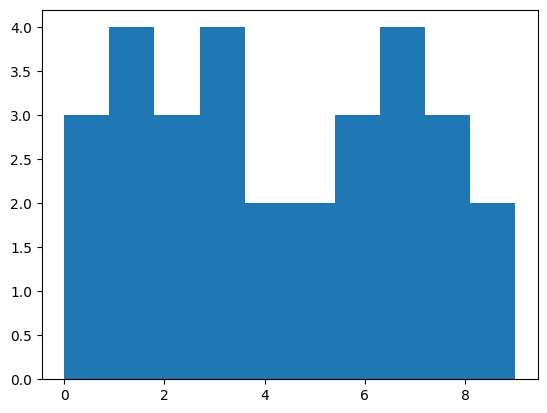

In [119]:
plt.hist(sample)
plt.show()

## Analyse von echten Daten

Mittelwert und Varianz sind sehr wichtig bei der Analyse von realen Daten. Laden wir die Daten über Baseballspieler von [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights).


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Wir verwenden hier ein Paket namens [**Pandas**](https://pandas.pydata.org/) für die Datenanalyse. Später in diesem Kurs werden wir mehr über Pandas und die Arbeit mit Daten in Python sprechen.

Lassen Sie uns die Durchschnittswerte für Alter, Größe und Gewicht berechnen:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Lassen wir uns nun auf die Größe konzentrieren und die Standardabweichung und Varianz berechnen:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Zusätzlich zum Mittelwert ist es sinnvoll, den Medianwert und die Quartile zu betrachten. Diese können mit einem **Boxplot** visualisiert werden:


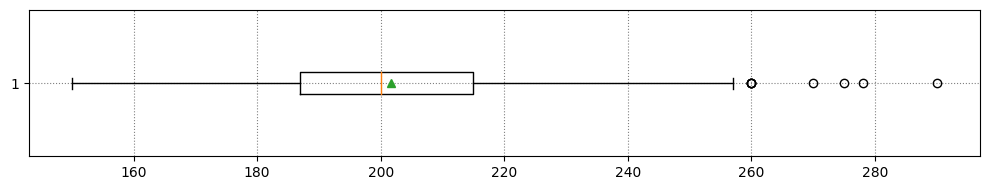

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Wir können auch Boxplots von Teilmengen unseres Datensatzes erstellen, zum Beispiel gruppiert nach Spielerrolle.


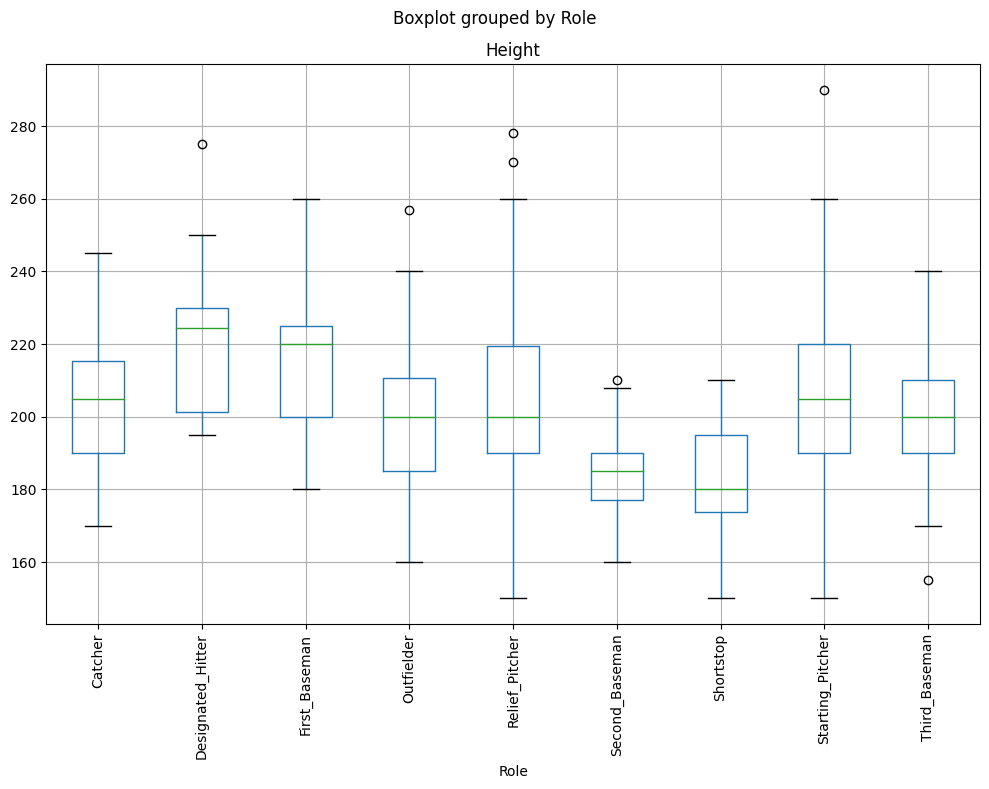

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Hinweis**: Dieses Diagramm deutet darauf hin, dass die Körpergrößen von First Basemen im Durchschnitt höher sind als die von Second Basemen. Später werden wir lernen, wie wir diese Hypothese formeller testen können und wie wir zeigen können, dass unsere Daten statistisch signifikant sind, um dies zu belegen.

Alter, Größe und Gewicht sind allesamt stetige Zufallsvariablen. Was denken Sie, wie ihre Verteilung aussieht? Eine gute Möglichkeit, das herauszufinden, ist, das Histogramm der Werte zu zeichnen:


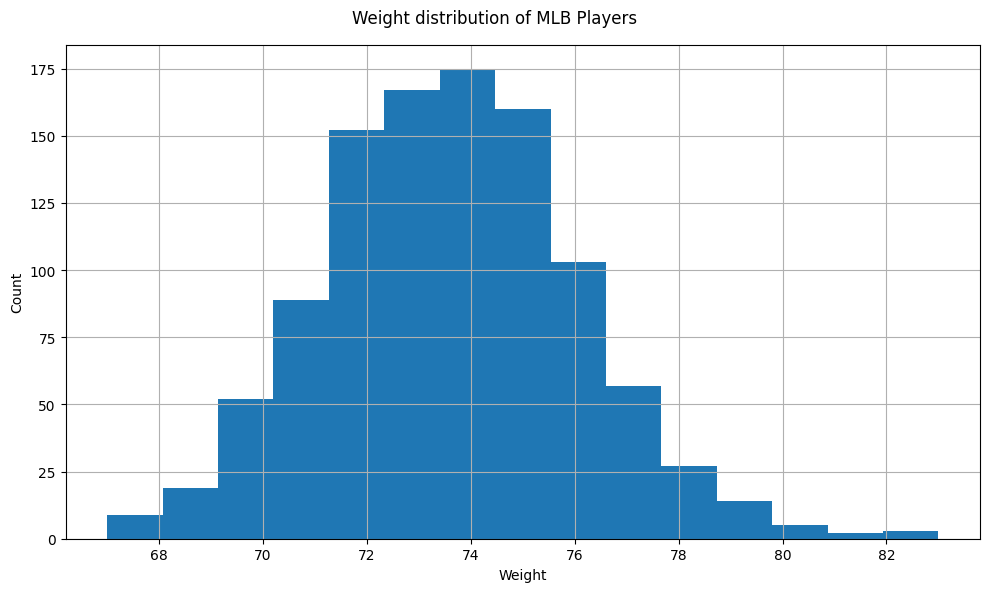

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normalverteilung

Lassen Sie uns eine künstliche Stichprobe von Gewichten erstellen, die einer Normalverteilung mit dem gleichen Mittelwert und der gleichen Varianz wie unsere echten Daten folgt:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

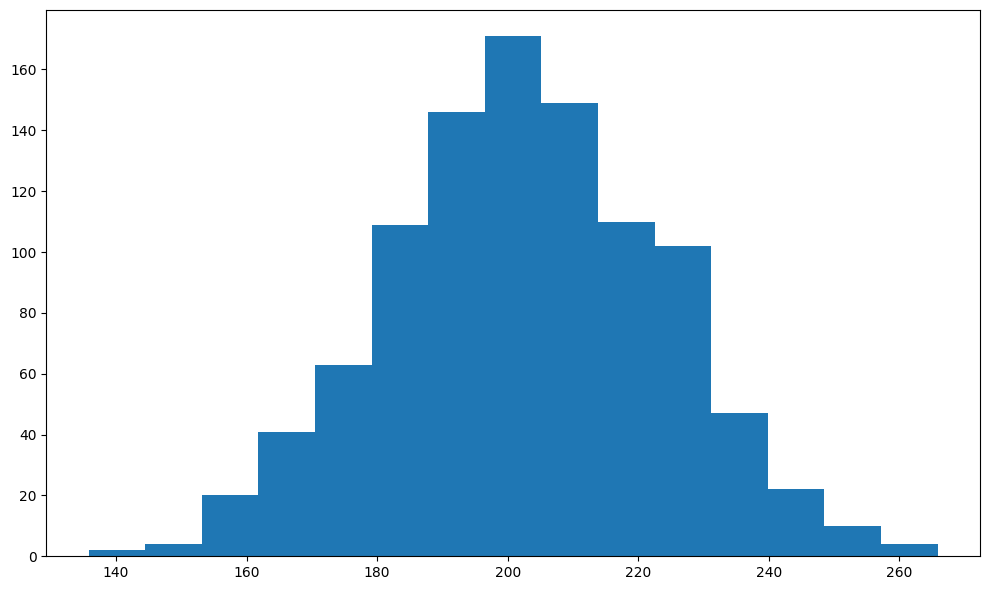

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

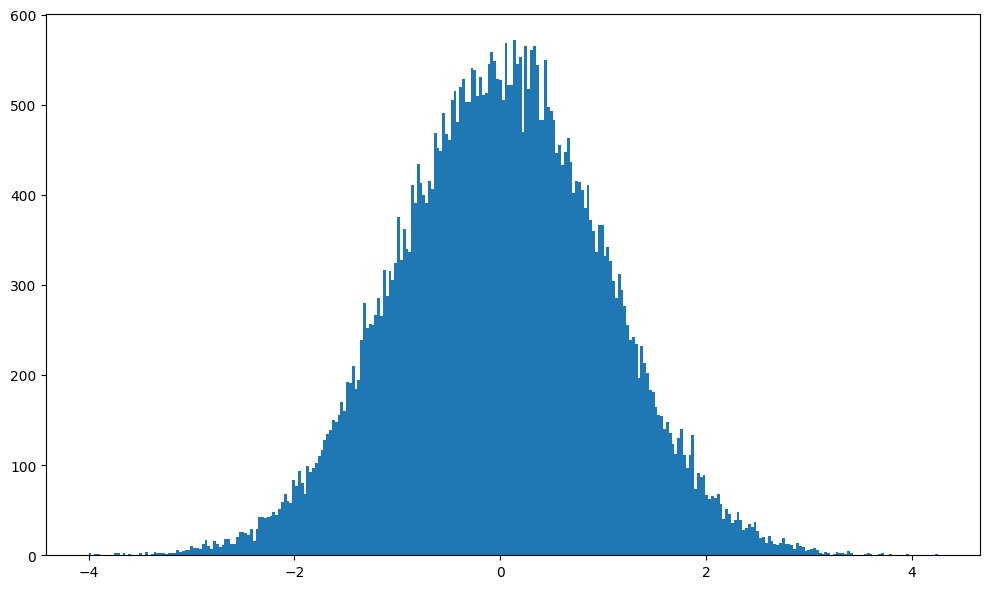

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Da die meisten Werte im echten Leben normalverteilt sind, sollten wir keinen gleichmäßigen Zufallszahlengenerator verwenden, um Beispieldaten zu erzeugen. Hier ist, was passiert, wenn wir versuchen, Gewichte mit einer Gleichverteilung zu erzeugen (erzeugt durch `np.random.rand`):


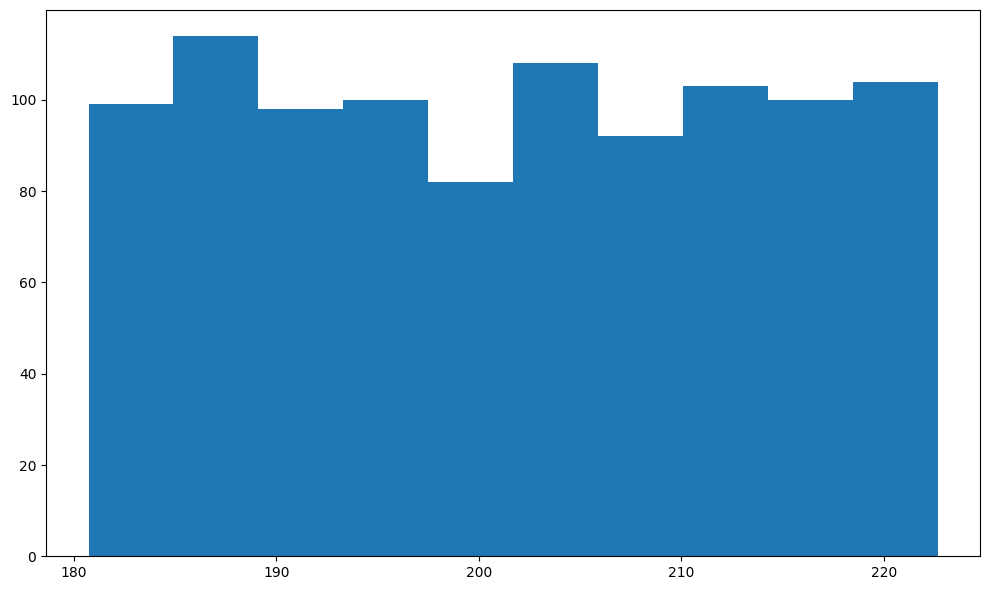

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Konfidenzintervalle

Lassen Sie uns nun Konfidenzintervalle für die Gewichte und Größen von Baseballspielern berechnen. Wir verwenden den Code [aus dieser Stackoverflow-Diskussion](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Hypothesentests

Lassen Sie uns die verschiedenen Rollen in unserem Baseballspieler-Datensatz untersuchen:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Wir können sehen, dass sich die Intervalle nicht überschneiden.

Eine statistisch korrektere Methode, um die Hypothese zu beweisen, ist die Verwendung eines **Student-t-Tests**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Die zwei Werte, die von der Funktion `ttest_ind` zurückgegeben werden, sind:
* Der p-Wert kann als die Wahrscheinlichkeit betrachtet werden, dass zwei Verteilungen denselben Mittelwert haben. In unserem Fall ist er sehr niedrig, was darauf hindeutet, dass es starke Beweise dafür gibt, dass First Basemen größer sind.
* Der t-Wert ist der Zwischenwert der normalisierten Mittelwertdifferenz, der im t-Test verwendet wird, und er wird mit einem Schwellenwert für einen gegebenen Vertrauenswert verglichen.


## Simulation einer Normalverteilung mit dem zentralen Grenzwertsatz

Der Pseudo-Zufallsgenerator in Python ist darauf ausgelegt, uns eine gleichmäßige Verteilung zu liefern. Wenn wir einen Generator für die Normalverteilung erstellen möchten, können wir den zentralen Grenzwertsatz verwenden. Um einen normalverteilten Wert zu erhalten, berechnen wir einfach den Mittelwert einer gleichmäßig generierten Stichprobe.


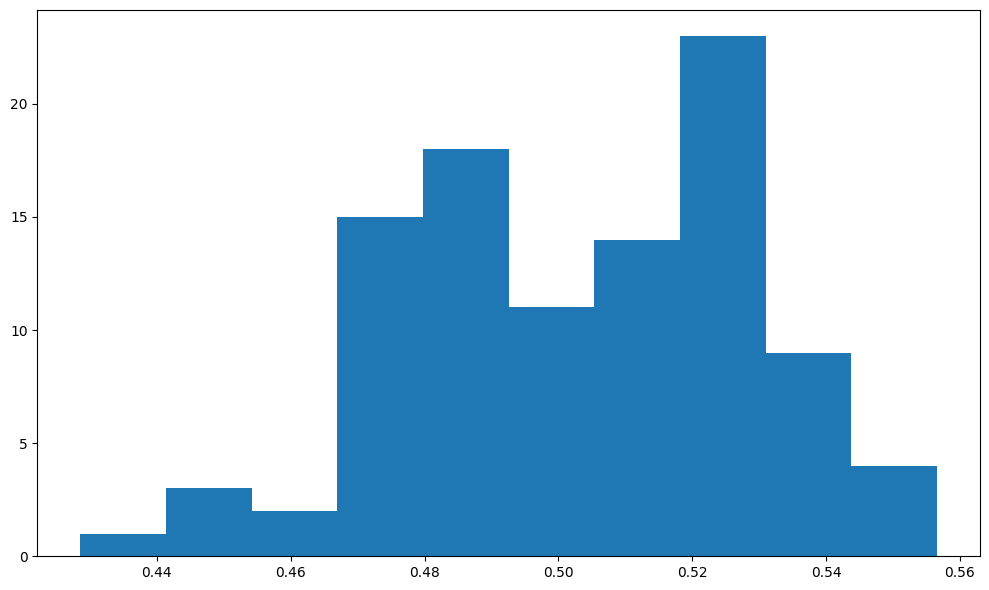

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korrelation und die böse Baseballfirma

Die Korrelation ermöglicht es uns, Beziehungen zwischen Datenreihen zu finden. In unserem Beispiel nehmen wir an, es gibt eine böse Baseballfirma, die ihre Spieler nach ihrer Körpergröße bezahlt – je größer der Spieler, desto mehr Geld bekommt er/sie. Angenommen, es gibt ein Grundgehalt von 1000 $, und einen zusätzlichen Bonus von 0 bis 100 $, abhängig von der Körpergröße. Wir werden die echten Spieler aus der MLB nehmen und ihre imaginären Gehälter berechnen:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Lassen Sie uns nun die Kovarianz und Korrelation dieser Sequenzen berechnen. `np.cov` liefert uns eine sogenannte **Kovarianzmatrix**, die eine Erweiterung der Kovarianz auf mehrere Variablen darstellt. Das Element $M_{ij}$ der Kovarianzmatrix $M$ ist eine Korrelation zwischen den Eingabevariablen $X_i$ und $X_j$, und die Diagonalwerte $M_{ii}$ sind die Varianz von $X_{i}$. Ebenso liefert `np.corrcoef` uns die **Korrelationsmatrix**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Eine Korrelation von 1 bedeutet, dass eine starke **lineare Beziehung** zwischen zwei Variablen besteht. Wir können die lineare Beziehung visuell erkennen, indem wir einen Wert gegen den anderen plotten:


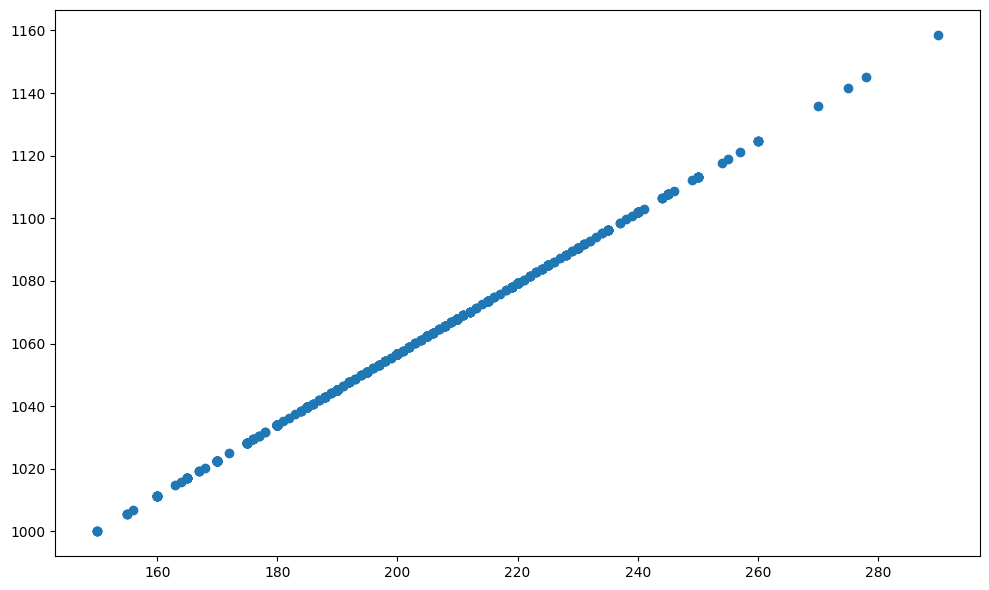

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

Lass uns sehen, was passiert, wenn die Beziehung nicht linear ist. Angenommen, unser Unternehmen hat beschlossen, die offensichtliche lineare Abhängigkeit zwischen Körpergrößen und Gehältern zu verbergen und eine Nicht-Linearität in die Formel einzuführen, wie zum Beispiel `sin`:


In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


In diesem Fall ist die Korrelation etwas geringer, aber sie ist immer noch ziemlich hoch. Um die Beziehung noch weniger offensichtlich zu machen, könnten wir etwas zusätzliche Zufälligkeit hinzufügen, indem wir eine Zufallsvariable zum Gehalt hinzufügen. Schauen wir mal, was passiert:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


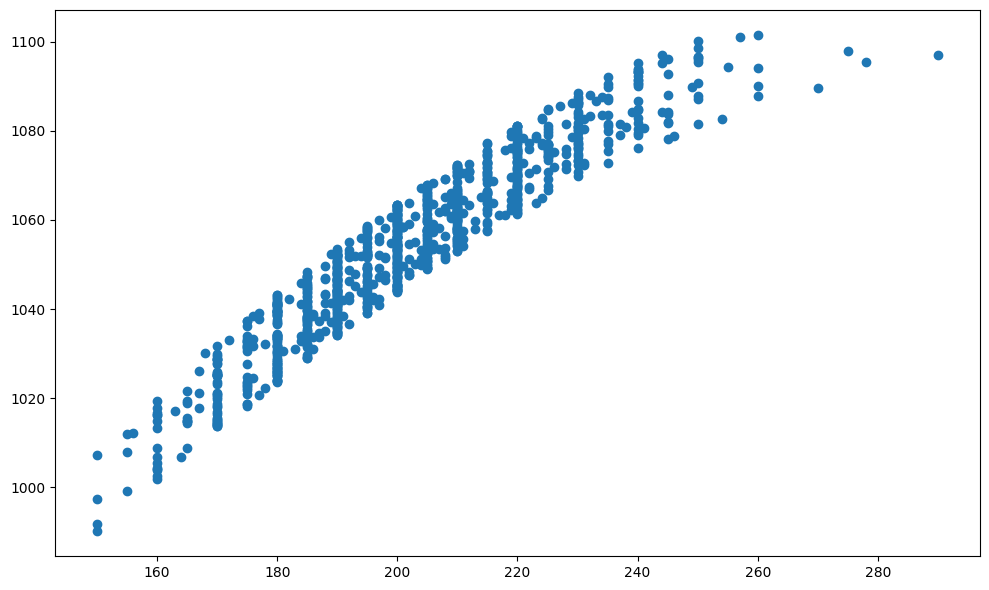

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Können Sie erraten, warum sich die Punkte so in vertikale Linien anordnen?

Wir haben die Korrelation zwischen einem künstlich konstruierten Konzept wie Gehalt und der beobachteten Variablen *Größe* untersucht. Schauen wir uns nun an, ob auch zwei beobachtete Variablen wie Größe und Gewicht miteinander korrelieren:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Leider haben wir keine Ergebnisse erhalten - nur einige seltsame `nan`-Werte. Dies liegt daran, dass einige Werte in unserer Serie undefiniert sind, dargestellt als `nan`, was dazu führt, dass das Ergebnis der Operation ebenfalls undefiniert ist. Wenn wir uns die Matrix ansehen, können wir erkennen, dass die Spalte `Weight` das Problem darstellt, da die Selbstkorrelation zwischen den `Height`-Werten berechnet wurde.

> Dieses Beispiel zeigt die Bedeutung von **Datenvorbereitung** und **Datenbereinigung**. Ohne ordnungsgemäße Daten können wir nichts berechnen.

Lassen Sie uns die Methode `fillna` verwenden, um die fehlenden Werte zu füllen und die Korrelation zu berechnen:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

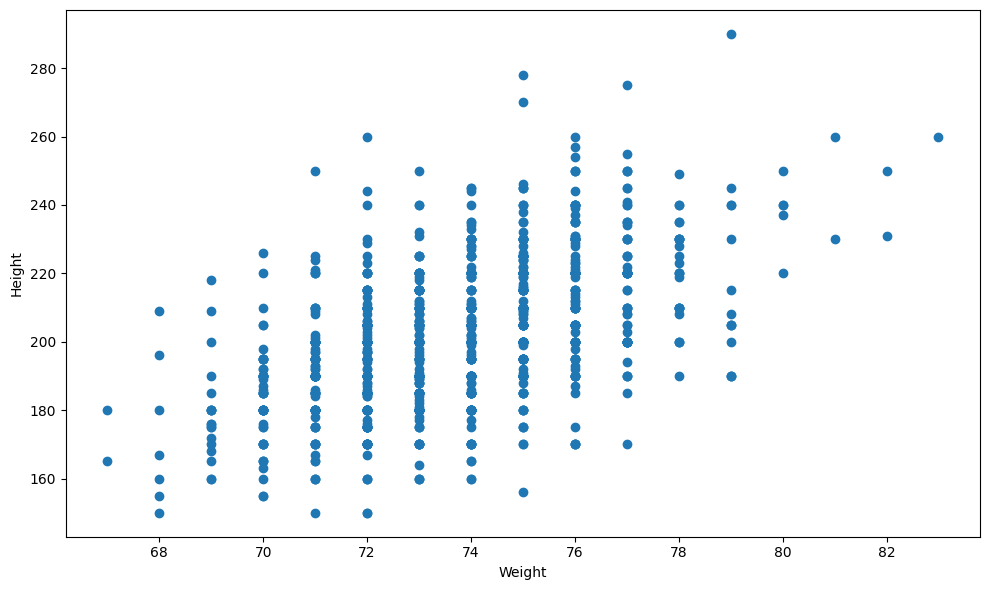

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Fazit

In diesem Notebook haben wir gelernt, wie man grundlegende Operationen mit Daten durchführt, um statistische Funktionen zu berechnen. Wir wissen nun, wie man ein solides Instrumentarium aus Mathematik und Statistik einsetzt, um einige Hypothesen zu überprüfen, und wie man Konfidenzintervalle für beliebige Variablen anhand einer Datenstichprobe berechnet.



---

**Haftungsausschluss**:  
Dieses Dokument wurde mithilfe des KI-Übersetzungsdienstes [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, weisen wir darauf hin, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die sich aus der Nutzung dieser Übersetzung ergeben.
